In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [2]:
def pmone():
    return 2 * stat.bernoulli(0.5).rvs() - 1

In [3]:
X = stat.norm
X

In [9]:
def comparison(Y, iters = 500, samplesize = 50):
    pmw = []; pks = [];
    for i in range(iters):
        xsample = X(0,1).rvs(samplesize)
        ysample = Y.rvs(samplesize)
        pmw.append(stat.mannwhitneyu(xsample, ysample, use_continuity=False, alternative='less')[1])
        pks.append(stat.ks_2samp(xsample, ysample, alternative='greater', mode='auto')[1])
    
    xaxes = np.linspace(0, 1, iters)
    plt.plot(np.sort(pmw), xaxes, label = 'Манна - Уитни')
    plt.plot(sorted(pks), xaxes, label = 'Колмогорова - Смирнова')
    plt.plot(xaxes, xaxes)
    plt.legend()
    plt.show()
        

In [63]:
def double_pvalue(Y, perms = 10000, samplesize = 50):
    xsample = X(0,1).rvs(samplesize)
    ysample = Y.rvs(samplesize)
    
    pmw = stat.mannwhitneyu(xsample, ysample, use_continuity=False, alternative='less')[1]
    pks = stat.ks_2samp(xsample, ysample, alternative='greater', mode='exact')[1]
    
    countermw = 0; counterks = 0;
    for i in range(perms):
        tmp = np.concatenate((xsample, ysample), axis = None)
        
        tmp = np.random.permutation(tmp)
        #ysample = np.random.permutation(ysample)
        xsample = tmp[:samplesize]
        ysample = tmp[samplesize:2 * samplesize]
        
        if (stat.mannwhitneyu(xsample, ysample, use_continuity=False, alternative='less')[1] > pmw):
            countermw += 1
        
        if (stat.ks_2samp(xsample, ysample, alternative='greater', mode='exact')[1] > pks):
            counterks += 1
            
    print('Манна - Уитни:')
    print('Встроенный:', pmw, 'Перестановочный:', 1 - (countermw + 1) / (perms + 1))
    
    print('Колмогорова - Смирнова:')
    print('Встроенный:', pks, 'Перестановочный:', 1 - (counterks + 1) / (perms + 1))

## $\mathcal{N}(0,1)$

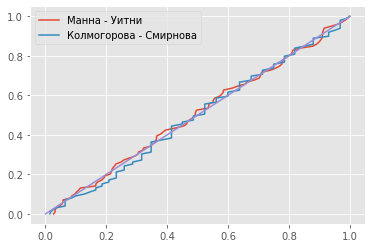

In [33]:
comparison(stat.norm(0,1), samplesize = 500)

In [64]:
double_pvalue(stat.norm(0,1), perms = 100000)

Манна - Уитни:
Встроенный: 0.6451526964967348 Перестановочный: 0.6457035429645703
Колмогорова - Смирнова:
Встроенный: 0.7282190412046127 Перестановочный: 0.7286627133728663


## $\mathcal{N}(1,1)$ 

(С односторонней альтернативой)

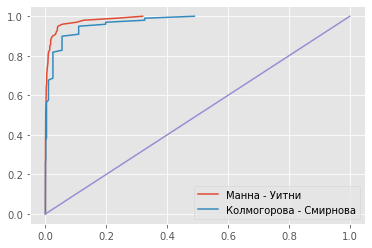

In [34]:
comparison(stat.norm(1,1), samplesize = 22)

In [65]:
double_pvalue(stat.norm(1,1), perms = 10000, samplesize = 20)

Манна - Уитни:
Встроенный: 0.00036076968600145967 Перестановочный: 9.999000099991662e-05
Колмогорова - Смирнова:
Встроенный: 0.0005579007731157464 Перестановочный: 0.00029997000299974985


## $\mathcal{N}(0,3/2)$ 

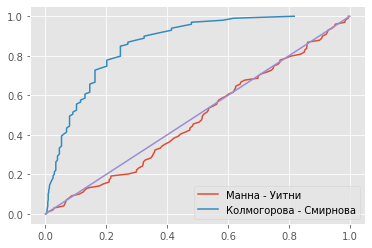

In [35]:
comparison(stat.norm(0, m.sqrt(3/2)), samplesize = 600)

In [66]:
double_pvalue(stat.norm(0, m.sqrt(3/2)), perms = 10000)

Манна - Уитни:
Встроенный: 0.46703476956544354 Перестановочный: 0.4790520947905209
Колмогорова - Смирнова:
Встроенный: 0.13624790320437033 Перестановочный: 0.13928607139286076


# $t_k$ 
$t = 3 \quad t = 42$

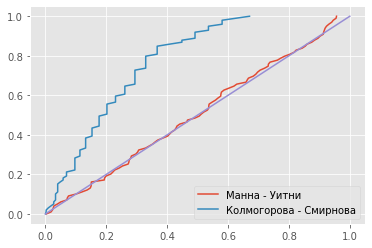

In [36]:
comparison(stat.t(3), samplesize = 360)

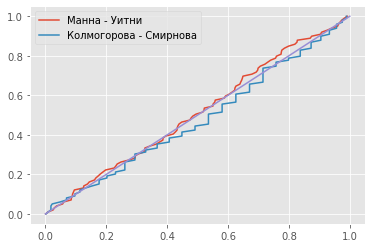

In [55]:
comparison(stat.t(42), samplesize = 360)

In [67]:
double_pvalue(stat.t(3), perms = 10000)

Манна - Уитни:
Встроенный: 0.33203143479342256 Перестановочный: 0.33496650334966505
Колмогорова - Смирнова:
Встроенный: 0.37779784844449826 Перестановочный: 0.3747625237476252


In [68]:
double_pvalue(stat.t(42), perms = 10000)

Манна - Уитни:
Встроенный: 0.7840356344275737 Перестановочный: 0.7787221277872213
Колмогорова - Смирнова:
Встроенный: 0.9803921568627451 Перестановочный: 0.9782021797820218


### Центрированная нормированная сумма экспоненциальных

##### k = 3

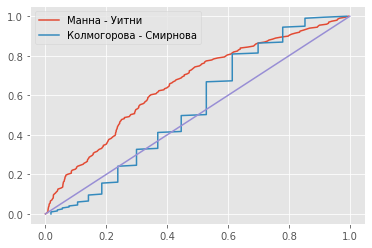

In [61]:
iters = 200; samplesize = 100; k = 3

pmw = []; pks = [];
for i in range(iters):
    xsample = X(0,1).rvs(samplesize)
    ysample = []
    for j in range(samplesize):
        ysample.append(np.sum(stat.expon().rvs(k) - 1)/m.sqrt(k))
        
   # print(ysample)
    
    pmw.append(stat.mannwhitneyu(xsample, ysample, use_continuity=False, alternative='greater')[1])
    pks.append(stat.ks_2samp(xsample, ysample, alternative='greater', mode='auto')[1])
    
xaxes = np.linspace(0, 1, iters)
plt.plot(np.sort(pmw), xaxes, label = 'Манна - Уитни')
plt.plot(sorted(pks), xaxes, label = 'Колмогорова - Смирнова')
plt.plot(xaxes, xaxes)
plt.legend()
plt.show()

###### k = 42

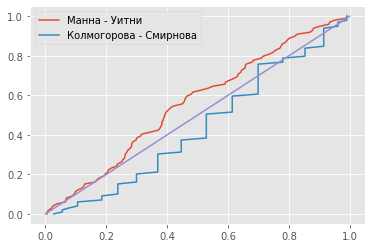

In [62]:
iters = 100; samplesize = 100; k = 42

pmw = []; pks = [];
for i in range(iters):
    xsample = X(0,1).rvs(samplesize)
    ysample = []
    for j in range(samplesize):
        ysample.append(np.sum(stat.expon().rvs(k) - 1)/m.sqrt(k))
        
   # print(ysample)
    
    pmw.append(stat.mannwhitneyu(xsample, ysample, use_continuity=False, alternative='greater')[1])
    pks.append(stat.ks_2samp(xsample, ysample, alternative='greater', mode='auto')[1])
    
xaxes = np.linspace(0, 1, iters)
plt.plot(np.sort(pmw), xaxes, label = 'Манна - Уитни')
plt.plot(sorted(pks), xaxes, label = 'Колмогорова - Смирнова')
plt.plot(xaxes, xaxes)
plt.legend()
plt.show()

###### k = 5

In [69]:
perms = 10000; 

xsample = X(0,1).rvs(samplesize)
ysample = []; k = 5
for j in range(samplesize):
    ysample.append(np.sum(stat.expon().rvs(k) - 1)/k)
    
pmw = stat.mannwhitneyu(xsample, ysample, use_continuity=False, alternative='greater')[1]
pks = stat.ks_2samp(xsample, ysample, alternative='greater', mode='exact')[1]

countermw = 0; counterks = 0;
for i in range(perms):
    tmp = np.concatenate((xsample, ysample), axis = None)
        
    tmp = np.random.permutation(tmp)
        #ysample = np.random.permutation(ysample)
    xsample = tmp[:samplesize]
    ysample = tmp[samplesize:2 * samplesize]
        
    if (stat.mannwhitneyu(xsample, ysample, use_continuity=False, alternative='greater')[1] > pmw):
        countermw += 1
        
    if (stat.ks_2samp(xsample, ysample, alternative='greater', mode='exact')[1] > pks):
        counterks += 1
            
print('Манна - Уитни:')
print('Встроенный:', pmw, 'Перестановочный:', 1 - (countermw + 1) / (perms + 1))
    
print('Колмогорова - Смирнова:')
print('Встроенный:', pks, 'Перестановочный:', 1 - (counterks + 1) / (perms + 1))

Манна - Уитни:
Встроенный: 0.02516465330121478 Перестановочный: 0.02349765023497652
Колмогорова - Смирнова:
Встроенный: 0.012027915167874704 Перестановочный: 0.00989901009899008


Критерий Колмогорова - Смирнова различает величины с одинаковым средним  намного лучше, чем критерий Манна - Уитни

Для центрированной нормированной суммы экспоненциальных М _ В сильнее.